### Loading dataset

Dưới đây là một ví dụ về cách tải bộ dữ liệu thời trang từ Torchvision(Fashion-MNIST). Fashion-MNIST là một bộ dữ liệu về hình ảnh bài viết của Zalando bao gồm 60.000 ví dụ đào tạo và 10.000 ví dụ thử nghiệm. Mỗi ví dụ bao gồm một hình ảnh thang độ xám 28 × 28 và một nhãn liên quan từ một trong 10 lớp.

We load the FashionMNIST Dataset with the following parameters:

    root is the path where the train/test data is stored,

    train specifies training or test dataset,

    download=True downloads the data from the internet if it’s not available at root.

    transform and target_transform specify the feature and label transformations

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100.0%
100.0%
100.0%
100.0%


### Trực quan hóa bộ dữ liệu

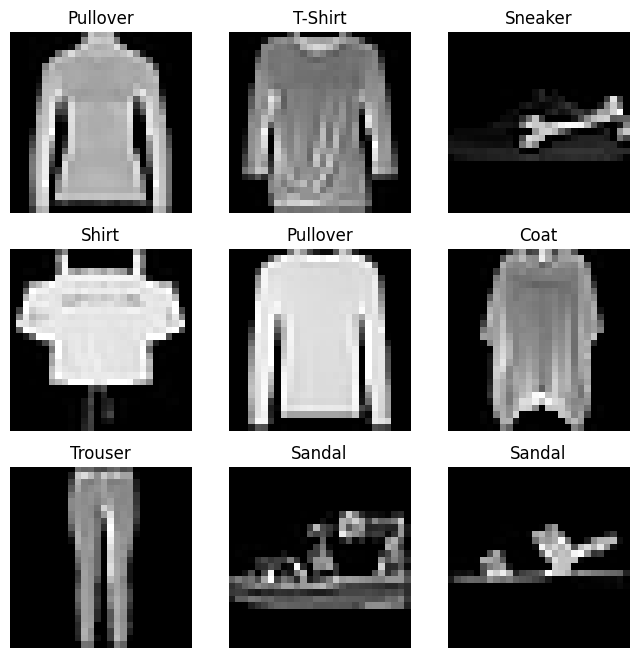

In [2]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### Creating a Custom Dataset for your files

Một lớp dữ liệu tùy chỉnh phải thực hiện ba chức năng: __init__, __len__ và __getItem__. Hãy xem việc thực hiện này; Các hình ảnh FashionMnist được lưu trữ trong một thư mục IMG_DIR và nhãn của chúng được lưu trữ riêng trong một tệp CSV Annotations_File.

In [ ]:
import os
import pandas as pd
from torchvision.io import decode_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = decode_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
            
        return image, label

### __init__()

Hàm __init__ được chạy một lần khi khởi tạo đối tượng dữ liệu. Chúng tôi khởi tạo thư mục chứa hình ảnh, tệp chú 

thích và cả hai biến đổi. 

Tệp nhãn.csv trông giống như:

    tshirt1.jpg, 0
    tshirt2.jpg, 0
    ......
    ankleboot999.jpg, 9

In [ ]:
def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

### __len__()

Hàm __len__ trả về số lượng mẫu trong bộ dữ liệu

In [ ]:
def __len__(self):
    return len(self.img_labels)

### __getitem__()

Hàm __getItem__ tải và trả về một mẫu từ bộ dữ liệu tại IDX chỉ mục đã cho. Dựa trên chỉ mục, nó xác định vị trí của hình ảnh trên đĩa, chuyển đổi nó thành tensor bằng Decode_image, lấy nhãn tương ứng từ dữ liệu CSV trong self.img_labels, gọi các hàm biến đổi trên chúng (nếu có) và trả về hình ảnh tenxor và nhãn tương ứng.

In [ ]:
def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = decode_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
            
        return image, label

### Preparing your data for training with DataLoaders

Dataset là lớp cơ bản dùng để định nghĩa tập dữ liệu.

Mỗi lần truy cập vào Dataset, bạn nhận được một sample gồm: features và labels.

Không nên đưa từng mẫu vào ⇒ chậm và không hiệu quả

Thay vào đó, chia dữ liệu thành từng batch nhỏ (mini-batch)

Việc shuffle sau mỗi epoch giúp model không bị học thuộc thứ tự của dữ liệu

DataLoader có thể dùng nhiều process song song để load dữ liệu nhanh hơn (qua tham số num_workers)

In [3]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


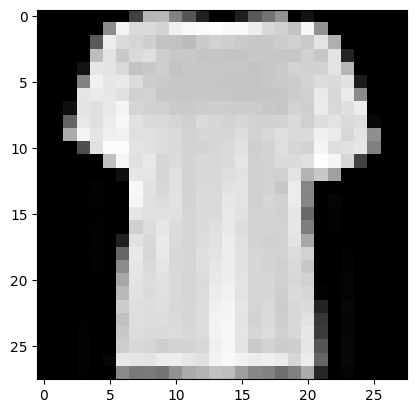

Label: 0


In [4]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

🔧 Giống như người chia dữ liệu ra từng phần để model dễ học hơn.
Khi bạn huấn luyện một mô hình (model), bạn không thể đưa toàn bộ dữ liệu vào một lần, vì:

Dữ liệu có thể rất lớn

Model sẽ khó học, dễ bị quá tải bộ nhớ (RAM/VRAM)

👉 Vậy DataLoader là công cụ:
Chia nhỏ dữ liệu thành từng "batch" (ví dụ 64 mẫu/lần)

Tự động lấy từng batch ra khi bạn huấn luyện model

Có thể xáo trộn dữ liệu (shuffle=True) sau mỗi vòng (epoch)

Có thể dùng nhiều luồng để load dữ liệu nhanh hơn (num_workers)

Giả sử bạn có 1000 ảnh mèo và chó, muốn huấn luyện model phân loại:

Nếu không dùng DataLoader, bạn phải làm thủ công rất mất công, không hiệu quả

In [ ]:
for i in range(1000):
    train(model, image[i], label[i])


Nếu dùng DataLoader: Mỗi lần lấy ra 64 ảnh cùng lúc, dễ huấn luyện, dễ quản lý.

In [ ]:
for batch_images, batch_labels in dataloader:
    train(model, batch_images, batch_labels)


| Tính năng      | Lợi ích                                      |
| -------------- | -------------------------------------------- |
| `batch_size`   | Giúp chia dữ liệu nhỏ lại, học nhanh hơn     |
| `shuffle=True` | Giúp model không học thuộc thứ tự dữ liệu    |
| `num_workers`  | Tăng tốc độ load dữ liệu                     |
| `iterable`     | Duyệt qua dễ dàng như `for x in dataloader:` |
